<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/ZTM/exercises/tfdev_exercise_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 03: Computer Vision & Convolutional Neural Networks

---

## 1) Spend 20-minutes reading and interacting with the CNN explainer website. What are the key terms? e.g. explain convolution in your own words, pooling in your own words.

In [ ]:
# skip

## 2) Play around with the "understanding hyperparameters" section in the CNN explainer website for 10-minutes. What is the kernel size? What is the stride? How could you adjust each of these in TensorFlow code?

In [ ]:
# skip

## 3) Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

In [ ]:
# skip

## 4) Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [ ]:
# skip

## 5) Extra: TensorFlow Data Augmentation Tutorial. For a more in-depth introduction on data augmentation with TensorFlow, spend an hour or two reading through this tutorial.

In [2]:
# load library
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
# download a dataset
(train_ds, val_ds, test_ds), metadata = tfds.load(
    "tf_flowers",
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [4]:
# check number of classes
num_classes = metadata.features["label"].num_classes
print(num_classes)

5


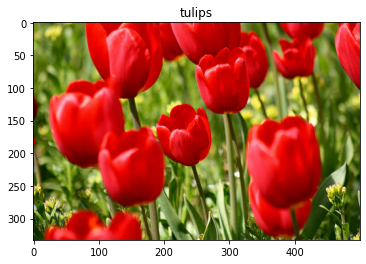

In [5]:
# get an image
get_label_name = metadata.features["label"].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

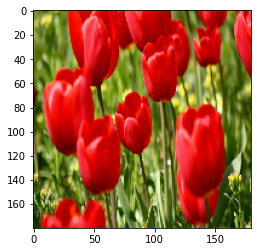

In [6]:
# resize and rescale
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
    tf.keras.layers.Rescaling(1./255)
])

result = resize_and_rescale(image)
_ = plt.imshow(result)

In [7]:
# ensure image is rescaled to between 0 and 1
result.numpy().min(), result.numpy().max()

(0.0, 1.0)

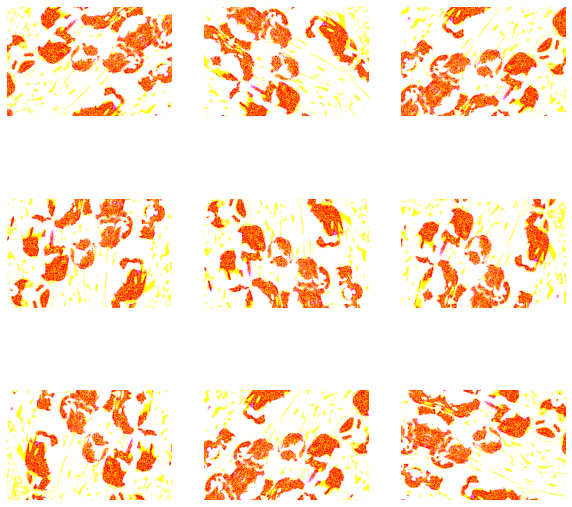

In [8]:
# augment image by fliping and rotating
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

image = tf.cast(tf.expand_dims(image, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

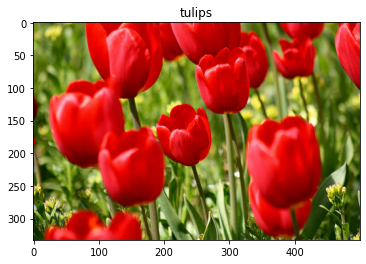

In [9]:
# now instead use tf.image API to augment images
# redownload a dataset
(train_ds, val_ds, test_ds), metadata = tfds.load(
    "tf_flowers",
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [10]:
# function to compare original vs augmented
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)

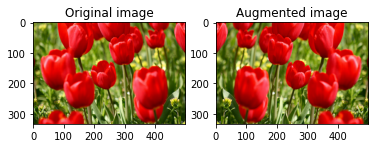

In [11]:
# flip an image
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

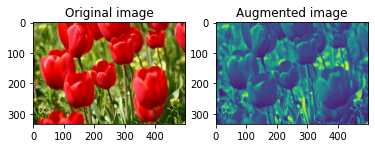

In [21]:
# grayscale an image
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))

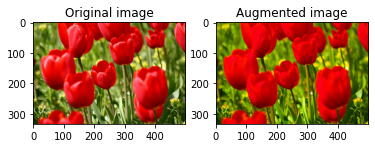

In [27]:
# saturate an image
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

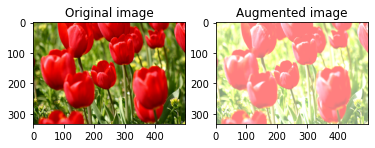

In [31]:
# change brightness
bright = tf.image.adjust_brightness(image, 0.5)
visualize(image, bright)

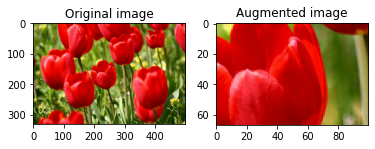

In [34]:
# center-crop an image
cropped = tf.image.central_crop(image, central_fraction=0.2)
visualize(image, cropped)

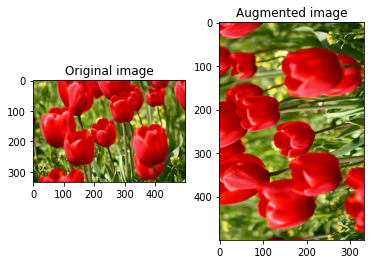

In [35]:
# rotate 90 degress
rotated = tf.image.rot90(image)
visualize(image, rotated)

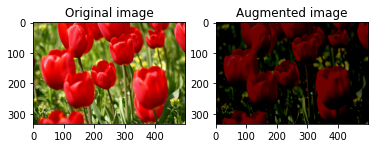

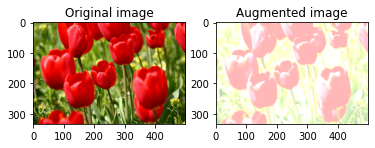

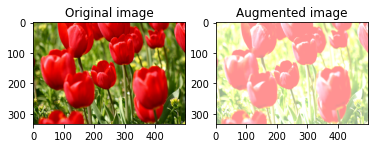

In [40]:
# randomly apply changes to brightness
for i in range(3):
    seed = (i, 0)
    stateless_random_brightness = tf.image.stateless_random_brightness(
        image, max_delta=0.95, seed=seed
    )
    visualize(image, stateless_random_brightness)

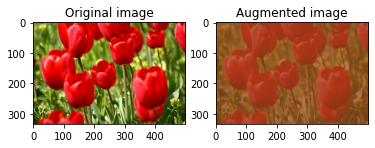

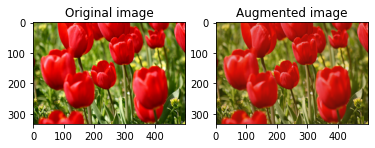

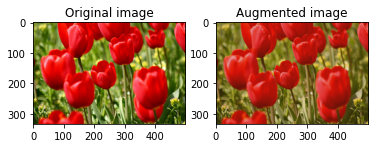

In [41]:
# randomly change image contrast
for i in range(3):
    seed = (i, 0) 
    stateless_random_contrast = tf.image.stateless_random_contrast(
        image, lower=0.1, upper=0.9, seed=seed
    )
    visualize(image, stateless_random_contrast)

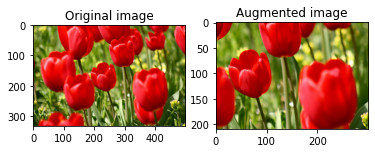

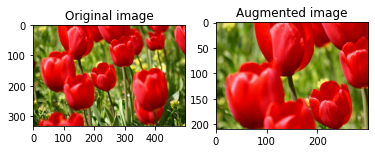

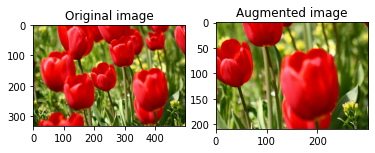

In [42]:
# randomly crop an image
for i in range(3):
    seed = (i, 0) 
    stateless_random_crop = tf.image.stateless_random_crop(
        image, size=[210, 300, 3], seed=seed
    )
    visualize(image, stateless_random_crop)